In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [15]:
data = pd.read_csv("data.csv")
data.head()

,Sample ID,DNA amount,NOC,Mixture Ratio,Mixture_1,Mixture_2,Mixture_3,Mixture_4,Max_mixture,degradation 1,degradation 2,degradation 3,degradation 4,sum
0,Newton11-2p-24F30-29M30-37-5pg-10-1,37.5,2,10_1,10,1,NaN,NaN,10,0.822,0.486,NaN,NaN,1.308
1,Newton11-2p-24F30-29M30-37-5pg-10-1,37.5,2,10_1,10,1,NaN,NaN,10,0.822,0.486,NaN,NaN,1.308
2,Newton28-2p-24F30-29M30-37-5pg-2-1,37.5,2,2_1,2,1,NaN,NaN,2,0.216,0.098,NaN,NaN,0.314
3,Newton90-2p-24F30-29M30-37-5pg-4-1,37.5,2,4_1,4,1,NaN,NaN,4,0.141,0.078,NaN,NaN,0.219
4,Newton59-2p-CST-5F-CST-13M-37-5pg-10-1,37.5,2,10_1,10,1,NaN,NaN,10,1.652,0.374,NaN,NaN,2.026


In [18]:
data_n = data.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13]]
data_n

,DNA amount,NOC,Mixture Ratio,Mixture_1,Mixture_2,Mixture_3,Mixture_4,Max_mixture,degradation 1,degradation 2,degradation 3,degradation 4,sum
0,37.5,2,10_1,10,1,NaN,NaN,10,0.822,0.486,NaN,NaN,1.308
1,37.5,2,10_1,10,1,NaN,NaN,10,0.822,0.486,NaN,NaN,1.308
2,37.5,2,2_1,2,1,NaN,NaN,2,0.216,0.098,NaN,NaN,0.314
3,37.5,2,4_1,4,1,NaN,NaN,4,0.141,0.078,NaN,NaN,0.219
4,37.5,2,10_1,10,1,NaN,NaN,10,1.652,0.374,NaN,NaN,2.026
...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,900.0,4,10_5_2_1,10,5,2.0,1.0,10,NaN,NaN,NaN,NaN,5.558
399,1000.0,4,4_3_2_1,4,3,2.0,1.0,4,NaN,NaN,NaN,NaN,2.336
400,1000.0,4,4_3_2_1,4,3,2.0,1.0,4,NaN,NaN,NaN,NaN,3.226
401,1800.0,4,10_5_2_1,10,5,2.0,1.0,10,NaN,NaN,NaN,NaN,5.909


In [23]:
data_n.isnull().sum()

DNA amount         0
NOC                0
Mixture Ratio      0
Mixture_1          0
Mixture_2          0
Mixture_3        222
Mixture_4        350
Max_mixture        0
degradation 1    134
degradation 2    134
degradation 3    297
degradation 4    370
sum                0
cluster            0
dtype: int64

In [20]:
data_n0 = data_n.fillna(0)

In [21]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, random_state = 0).fit(data_n0)
data_n['cluster']=kmeans.labels_
data_n.head()

,DNA amount,NOC,Mixture Ratio,Mixture_1,Mixture_2,Mixture_3,Mixture_4,Max_mixture,degradation 1,degradation 2,degradation 3,degradation 4,sum,cluster
0,37.5,2,10_1,10,1,NaN,NaN,10,0.822,0.486,NaN,NaN,1.308,0
1,37.5,2,10_1,10,1,NaN,NaN,10,0.822,0.486,NaN,NaN,1.308,0
2,37.5,2,2_1,2,1,NaN,NaN,2,0.216,0.098,NaN,NaN,0.314,0
3,37.5,2,4_1,4,1,NaN,NaN,4,0.141,0.078,NaN,NaN,0.219,0
4,37.5,2,10_1,10,1,NaN,NaN,10,1.652,0.374,NaN,NaN,2.026,0


In [22]:
data_n.groupby('cluster').count()

,DNA amount,NOC,Mixture Ratio,Mixture_1,Mixture_2,Mixture_3,Mixture_4,Max_mixture,degradation 1,degradation 2,degradation 3,degradation 4,sum
cluster,,,,,,,,,,,,,
0,395,395,395,395,395,173,45,395,265,265,102,29,395
1,8,8,8,8,8,8,8,8,4,4,4,4,8


In [25]:
df = data_n0.iloc[:, [0,1,7,8,9,10,11]]
df.head()

,DNA amount,NOC,Max_mixture,degradation 1,degradation 2,degradation 3,degradation 4
0,37.5,2,10,0.822,0.486,0.0,0.0
1,37.5,2,10,0.822,0.486,0.0,0.0
2,37.5,2,2,0.216,0.098,0.0,0.0
3,37.5,2,4,0.141,0.078,0.0,0.0
4,37.5,2,10,1.652,0.374,0.0,0.0


In [27]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 1000, random_state = 0).fit(df)
df['cluster']=kmeans.labels_
df.groupby('cluster').count()

<ipython-input-27-1a53cde8e25a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster']=kmeans.labels_


,DNA amount,NOC,Max_mixture,degradation 1,degradation 2,degradation 3,degradation 4
cluster,,,,,,,
0,177,177,177,177,177,177,177
1,226,226,226,226,226,226,226


In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(df)

df['pca_x'] = pca_transformed[:,0]
df['pca_y'] = pca_transformed[:,1]
df.head()

<ipython-input-28-6dd98a8e4d35>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pca_x'] = pca_transformed[:,0]
<ipython-input-28-6dd98a8e4d35>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pca_y'] = pca_transformed[:,1]


,DNA amount,NOC,Max_mixture,degradation 1,degradation 2,degradation 3,degradation 4,cluster,pca_x,pca_y
0,37.5,2,10,0.822,0.486,0.0,0.0,1,-328.965247,4.038102
1,37.5,2,10,0.822,0.486,0.0,0.0,1,-328.965247,4.038102
2,37.5,2,2,0.216,0.098,0.0,0.0,1,-328.976412,-3.965598
3,37.5,2,4,0.141,0.078,0.0,0.0,1,-328.973477,-1.970638
4,37.5,2,10,1.652,0.374,0.0,0.0,1,-328.965635,4.061426


In [29]:
df.groupby('cluster').count()

,DNA amount,NOC,Max_mixture,degradation 1,degradation 2,degradation 3,degradation 4,pca_x,pca_y
cluster,,,,,,,,,
0,177,177,177,177,177,177,177,177,177
1,226,226,226,226,226,226,226,226,226


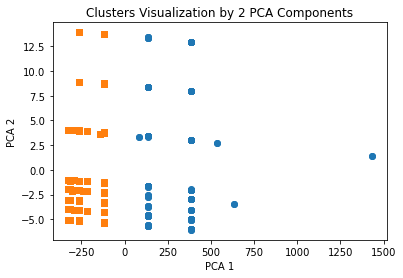

In [31]:
marker0_ind = df[df['cluster']==0].index
marker1_ind = df[df['cluster']==1].index

plt.scatter(x=df.loc[marker0_ind,'pca_x'], y=df.loc[marker0_ind,'pca_y'], marker='o') 
plt.scatter(x=df.loc[marker1_ind,'pca_x'], y=df.loc[marker1_ind,'pca_y'], marker='s')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Clusters Visualization by 2 PCA Components')
plt.show()

In [57]:
from sklearn.cluster import DBSCAN

data = pd.read_csv("data.csv")
data = data.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13]]
data = data.fillna(0)
df = data_n0.iloc[:, [0,1,7,8,9,10,11]]
df.head()

,DNA amount,NOC,Max_mixture,degradation 1,degradation 2,degradation 3,degradation 4
0,37.5,2,10,0.822,0.486,0.0,0.0
1,37.5,2,10,0.822,0.486,0.0,0.0
2,37.5,2,2,0.216,0.098,0.0,0.0
3,37.5,2,4,0.141,0.078,0.0,0.0
4,37.5,2,10,1.652,0.374,0.0,0.0


In [58]:
dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(df)

df['dbscan_cluster'] = dbscan_labels
df.head()

<ipython-input-58-0accf4b9d103>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dbscan_cluster'] = dbscan_labels


,DNA amount,NOC,Max_mixture,degradation 1,degradation 2,degradation 3,degradation 4,dbscan_cluster
0,37.5,2,10,0.822,0.486,0.0,0.0,-1
1,37.5,2,10,0.822,0.486,0.0,0.0,-1
2,37.5,2,2,0.216,0.098,0.0,0.0,-1
3,37.5,2,4,0.141,0.078,0.0,0.0,-1
4,37.5,2,10,1.652,0.374,0.0,0.0,-1


In [59]:
df.groupby('dbscan_cluster').count()

,DNA amount,NOC,Max_mixture,degradation 1,degradation 2,degradation 3,degradation 4
dbscan_cluster,,,,,,,
-1,231,231,231,231,231,231,231
0,8,8,8,8,8,8,8
1,8,8,8,8,8,8,8
2,10,10,10,10,10,10,10
3,8,8,8,8,8,8,8
4,10,10,10,10,10,10,10
5,16,16,16,16,16,16,16
6,10,10,10,10,10,10,10
7,10,10,10,10,10,10,10


In [36]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

<ipython-input-44-f9e2fe830ed5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ftr1'] = pca_transformed[:,0]
<ipython-input-44-f9e2fe830ed5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ftr2'] = pca_transformed[:,1]


IndexError: list index out of range

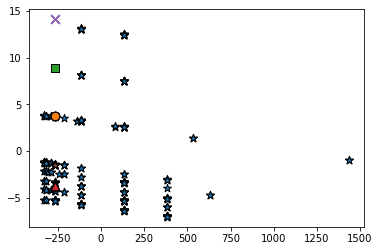

In [44]:
from sklearn.decomposition import PCA
# 2차원으로 시각화하기 위해 PCA n_componets=2로 피처 데이터 세트 변환
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(df)
# visualize_cluster_2d( ) 함수는 ftr1, ftr2 컬럼을 좌표에 표현하므로 PCA 변환값을 해당 컬럼으로 생성
df['ftr1'] = pca_transformed[:,0]
df['ftr2'] = pca_transformed[:,1]

visualize_cluster_plot(dbscan, df, 'dbscan_cluster', iscenter=False)